<a href="https://colab.research.google.com/github/jlgrons/JSC270_HW2/blob/main/JSC270_Assignment2_starter_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Libraries you'll likely need

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

###Importing data

In [5]:
income94 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
income94.columns = ['age','workclass', 'fnlwgt','education','education_num','marital_status','occupation',
                    'relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','gross_income_group']

In [15]:
income94

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,gross_income_group
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [14]:
# Part2 DataAnalysis
# Q1, About the data types of each column, age, fnlwgt, education_num,capital_gain, capital_loss, hours_per_week should be int from the text description,
# and the workclass, education, marital_status, occupation, relationship, race, sex, native_country, gross_income_group should all be strings, which perfectly fit with the type of our # dataset.
print(income94.dtypes)
# Q2, About the missing data, and the count of the missing data in each column.
income94.replace(' ?', np.nan, inplace=True)
missing_values_count = income94.isnull().sum()
print(missing_values_count)

age                    int64
workclass             object
fnlwgt                 int64
education             object
education_num          int64
marital_status        object
occupation            object
relationship          object
race                  object
sex                   object
capital_gain           int64
capital_loss           int64
hours_per_week         int64
native_country        object
gross_income_group    object
dtype: object
age                      0
workclass             1836
fnlwgt                   0
education                0
education_num            0
marital_status           0
occupation            1843
relationship             0
race                     0
sex                      0
capital_gain             0
capital_loss             0
hours_per_week           0
native_country         583
gross_income_group       0
dtype: int64


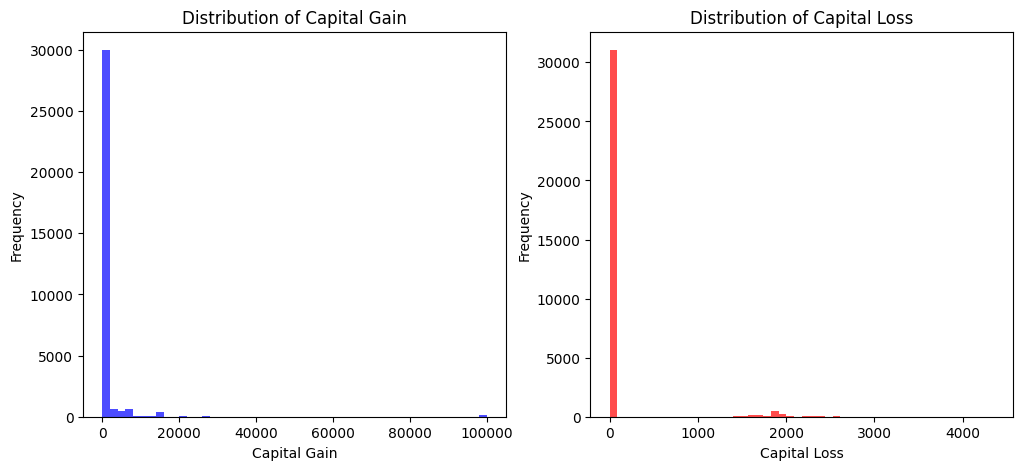

In [17]:
#Q3, first plot the distribution of capital_gain and capital_loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(income94['capital_gain'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Capital Gain')
plt.xlabel('Capital Gain')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
plt.hist(income94['capital_loss'], bins=50, color='red', alpha=0.7)
plt.title('Distribution of Capital Loss')
plt.xlabel('Capital Loss')
plt.ylabel('Frequency')
plt.show()
# As we can observed from the graph, majority individuals have no capital gain or loss, it will be hard to see the distribution with numerical data. Hence
# I think we can use the categorical data to plot the distribution of capital gain and loss. By set capital gain into categoies, if it's 0 then its no gain, if its from 1-5000 then its low gain, if its from 5000-15000 then its medium gain, if its greater than 15000 then its high gain, then for the capital loss, if its 0 then its no loss, if its from 1-2000 then its low loss, if its greater than 2000 then its high loss. Then we can plot the bar graph to show the distribution of capital gain and loss.
# First we creat the new column for capital gain and loss category.
def categorize_gain(value):
    if value == 0:
        return 'No Gain'
    elif value <= 5000:
        return 'Low Gain'
    elif value <= 15000:
        return 'Medium Gain'
    else:
        return 'High Gain'
income94['capital_gain_category'] = income94['capital_gain'].apply(categorize_gain)
def categorize_loss(value):
    if value == 0:
        return 'No Loss'
    elif value <= 2000:
        return 'Low Loss'
    else:
        return 'High Loss'
income94['capital_loss_category'] = income94['capital_loss'].apply(categorize_loss)
capital_gain_counts = income94['capital_gain_category'].value_counts()
capital_loss_counts = income94['capital_loss_category'].value_counts()


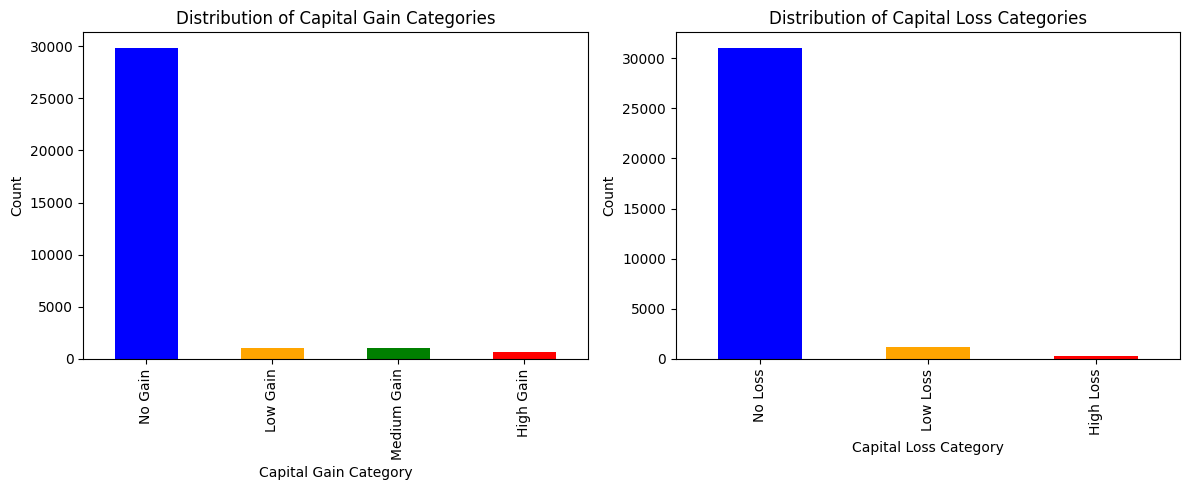

In [20]:
# graphical expression of Q3 for the categorical data of capital gain and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
income94['capital_gain_category'].value_counts().plot(kind='bar', color=['blue', 'orange', 'green', 'red'])
plt.title('Distribution of Capital Gain Categories')
plt.xlabel('Capital Gain Category')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
income94['capital_loss_category'].value_counts().plot(kind='bar', color=['blue', 'orange', 'red'])
plt.title('Distribution of Capital Loss Categories')
plt.xlabel('Capital Loss Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

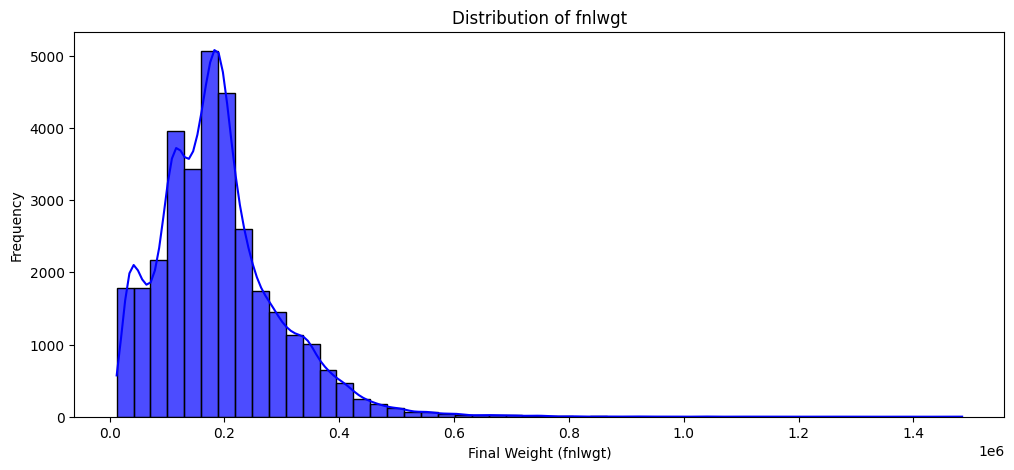

C:\Users\NKwyk\AppData\Local\Temp\ipykernel_12528\2591814345.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sex', y='fnlwgt', data=income94, palette='coolwarm')


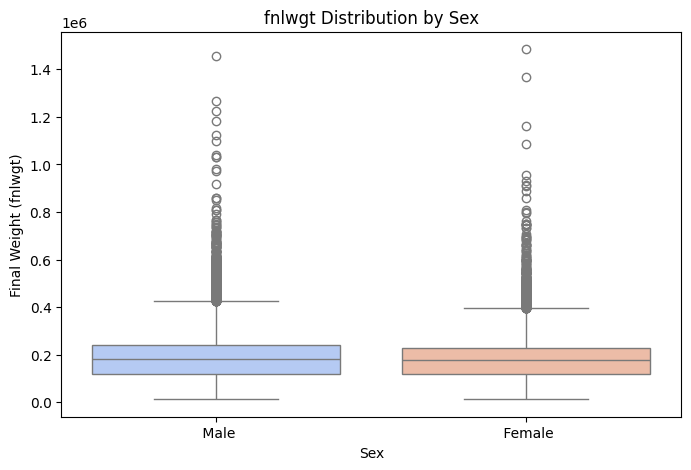

In [24]:
#Q4 About the variable fnlwgt, first we plot it to see the skewness of the data
plt.figure(figsize=(12, 5))
sns.histplot(income94['fnlwgt'], bins=50, kde=True, color='blue', alpha=0.7)
plt.title('Distribution of fnlwgt')
plt.xlabel('Final Weight (fnlwgt)')
plt.ylabel('Frequency')
plt.show()
# Analysing the aboving graph, the graph is right skewed, majority data are located around the lower range, and obviously it's not symmetric, there exist some high outliers with the large fnlwgt values.
# Then we use the bloxpolt to represent the difference between the men and women
plt.figure(figsize=(8, 5))
sns.boxplot(x='sex', y='fnlwgt', data=income94, palette='coolwarm')
plt.title('fnlwgt Distribution by Sex')
plt.xlabel('Sex')
plt.ylabel('Final Weight (fnlwgt)')
plt.show()
# we can see from the graph that there exist too many outliers, which there value is way more than the median of the whole data set, so I think we can indeed exclude those outliers. By using the formula of determine outliers which is Q3 + 1.5*IQR and Q1 - 1.5*IQR, we can find the outliers and exclude them.

C:\Users\NKwyk\AppData\Local\Temp\ipykernel_12528\3637560523.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sex', y='fnlwgt', data=income94_filtered, palette='coolwarm')


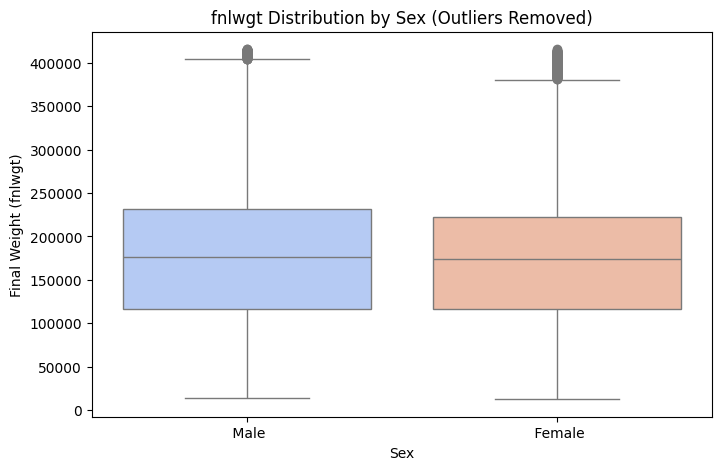

In [26]:
# The boxplot that removed the outliers, easier to observe the pattern, we can observe that the median of the men is slightly higher than the women, which means the women have higher fnlwgt value. but approximately they have similar distribution, so sex may not be a huge fator that influence the fnlwgt value.
Q1 = income94['fnlwgt'].quantile(0.25)
Q3 = income94['fnlwgt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
income94_filtered = income94[(income94['fnlwgt'] >= lower_bound) & (income94['fnlwgt'] <= upper_bound)]
plt.figure(figsize=(8, 5))
sns.boxplot(x='sex', y='fnlwgt', data=income94_filtered, palette='coolwarm')
plt.title('fnlwgt Distribution by Sex (Outliers Removed)')
plt.xlabel('Sex')
plt.ylabel('Final Weight (fnlwgt)')
plt.show()
# In the end we set the outliers to be the missing values
income94.loc[(income94['fnlwgt'] < lower_bound) | (income94['fnlwgt'] > upper_bound), 'fnlwgt'] = np.nan

32561